In [0]:
# http://yann.lecun.com/exdb/mnist/
# https://www.kaggle.com/oddrationale/mnist-in-csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!rm *

rm: cannot remove 'sample_data': Is a directory


In [3]:
from google.colab import files
a = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [8]:
b = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [0]:
import io
mnist_train = pd.read_csv(io.BytesIO(a['mnist_train.csv']))
mnist_test = pd.read_csv(io.BytesIO(b['mnist_test.csv']))

In [10]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [11]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
img = mnist_train[1:2]

img = img.drop('label', axis=1)
img

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
img = img.values
img.shape

(1, 784)

In [14]:
img = img.reshape(1, 28, 28)

img.shape

(1, 28, 28)

In [15]:
# squeeze function gets rid of dimensions with single values
img = img.squeeze()
img.shape

(28, 28)

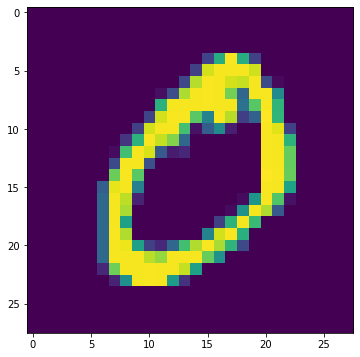

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(img)

In [0]:
mnist_train = mnist_test.dropna()
mnist_test = mnist_test.dropna()

In [0]:
mnist_train_features = mnist_train.drop('label', axis=1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [19]:
mnist_train.values.max(), mnist_train.values.min(), mnist_test.values.max(), mnist_test.values.min()

(255, 0, 255, 0)

In [0]:
mnist_train = mnist_train.astype('float32')
mnist_train = mnist_train/255

In [0]:
mnist_test = mnist_test.astype('float32')
mnist_test = mnist_test/255

In [22]:
mnist_train.values.max(), mnist_train.values.min(), mnist_test.values.max(), mnist_test.values.min()

(1.0, 0.0, 1.0, 0.0)

In [0]:
import torch

In [0]:
X_train_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [25]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [26]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [0]:
import torch.nn as nn

In [0]:
input_size = 784
output_size = 10

hidden1_size = 16
hidden2_size = 32

In [0]:
class Net(nn.Module):

  def __init__(self):

    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden1_size)
    self.fc2 = nn.Linear(hidden1_size, hidden2_size)
    self.fc3 = nn.Linear(hidden2_size, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    x = self.fc3(x)

    return torch.log_softmax(x, dim=-1)

In [0]:
model = Net()

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [32]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [0]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [0]:
import torch.optim as optim

In [0]:
optimizer = optim.Adam(model.parameters())
# learning rate is at default
loss_fn = nn.NLLLoss()

In [0]:
epochs = 500 

In [40]:
for epoch in range(1, epochs + 1):

  optimizer.zero_grad()
  Y_pred = model(X_train_tensor)

  loss = loss_fn(Y_pred, Y_train_tensor)
  loss.backward()

  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch - %d, loss - %0.2f' %(epoch, loss.item()))

Epoch - 10, loss - 2.25
Epoch - 20, loss - 2.21
Epoch - 30, loss - 2.17
Epoch - 40, loss - 2.14
Epoch - 50, loss - 2.10
Epoch - 60, loss - 2.07
Epoch - 70, loss - 2.02
Epoch - 80, loss - 1.98
Epoch - 90, loss - 1.93
Epoch - 100, loss - 1.88
Epoch - 110, loss - 1.82
Epoch - 120, loss - 1.77
Epoch - 130, loss - 1.72
Epoch - 140, loss - 1.67
Epoch - 150, loss - 1.62
Epoch - 160, loss - 1.57
Epoch - 170, loss - 1.52
Epoch - 180, loss - 1.47
Epoch - 190, loss - 1.42
Epoch - 200, loss - 1.37
Epoch - 210, loss - 1.32
Epoch - 220, loss - 1.28
Epoch - 230, loss - 1.23
Epoch - 240, loss - 1.19
Epoch - 250, loss - 1.15
Epoch - 260, loss - 1.11
Epoch - 270, loss - 1.07
Epoch - 280, loss - 1.03
Epoch - 290, loss - 0.99
Epoch - 300, loss - 0.96
Epoch - 310, loss - 0.92
Epoch - 320, loss - 0.89
Epoch - 330, loss - 0.86
Epoch - 340, loss - 0.83
Epoch - 350, loss - 0.80
Epoch - 360, loss - 0.78
Epoch - 370, loss - 0.75
Epoch - 380, loss - 0.72
Epoch - 390, loss - 0.70
Epoch - 400, loss - 0.67
Epoch - 4

In [41]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [43]:
with torch.no_grad():

  correct = 0
  total = 0

  outputs = model(x_test_tensor)
  _, predicted = torch.max(outputs.data, 1)

  y_test = y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print("Accuracy: ", accuracy_score(predicted, y_test))
  print("Precision: ", precision_score(predicted, y_test, average='weighted'))
  print("Recall: ", recall_score(predicted, y_test, average='weighted'))

Accuracy:  0.9117
Precision:  0.9131426135245556
Recall:  0.9117


In [0]:
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)
files.download('model.pkl')